# Plotting Volume Graphs

### Import Statements

In [11]:
import sys
import math
import warnings

import psycopg2
#import wrds
import gzip

import seaborn as sns
import os
import quandl
import json
import zipfile
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import functools
import requests
import io

import urllib.request
from urllib.error import HTTPError
# from html_table_parser.parser import HTMLTableParser
from bs4 import BeautifulSoup
import re

#import plotnine as p9
#from plotnine import ggplot, scale_x_date, guides, guide_legend, geom_bar, scale_y_continuous, \
    #scale_color_identity, geom_line, geom_point, labs, theme_minimal, theme, element_blank, element_text, \
        #geom_ribbon, geom_hline, aes, scale_size_manual, scale_color_manual, ggtitle

from datetime import datetime
import datetime

import pandas as pd
# import pandas_market_calendars as mcal
from pandas.plotting import autocorrelation_plot
import numpy as np
from numpy import cumsum, log, polyfit, sqrt, std, subtract
import scipy as sp
from scipy.stats import norm
import scipy.stats as stats

from statsmodels.tsa.stattools import coint
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

from collections import deque
from bisect import insort, bisect_left
from itertools import islice


### Graph Volume and Open Interest for 3 dates

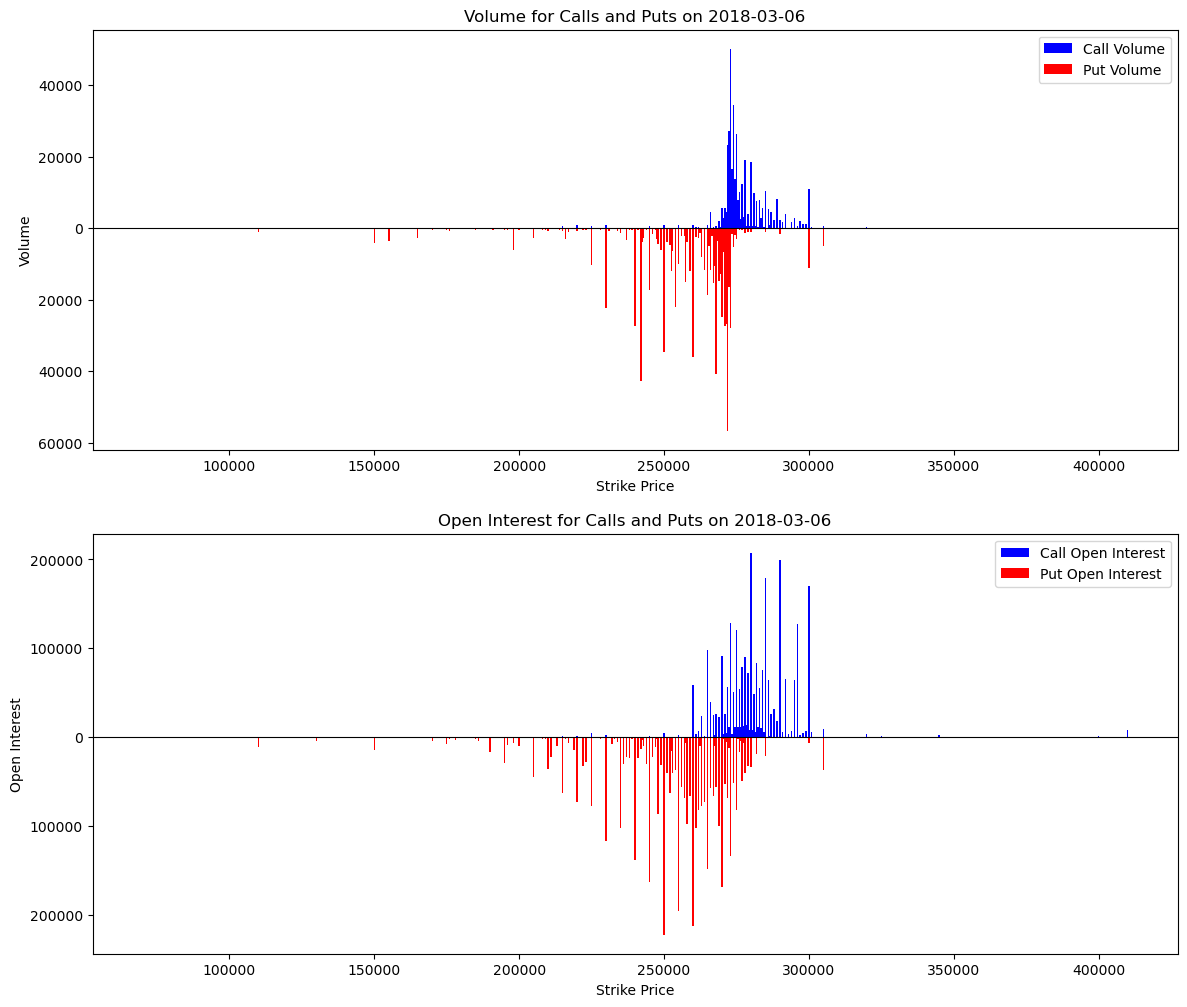

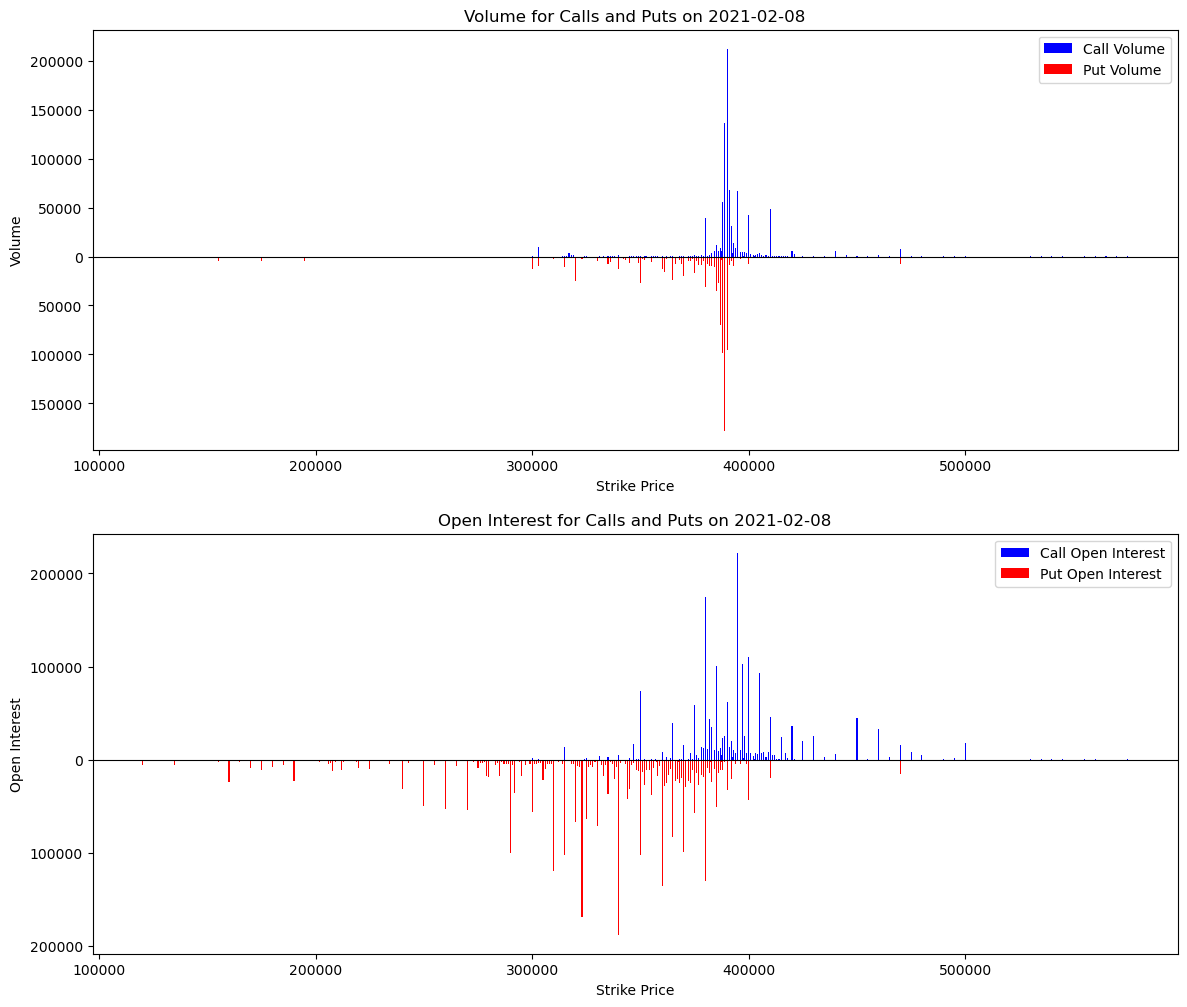

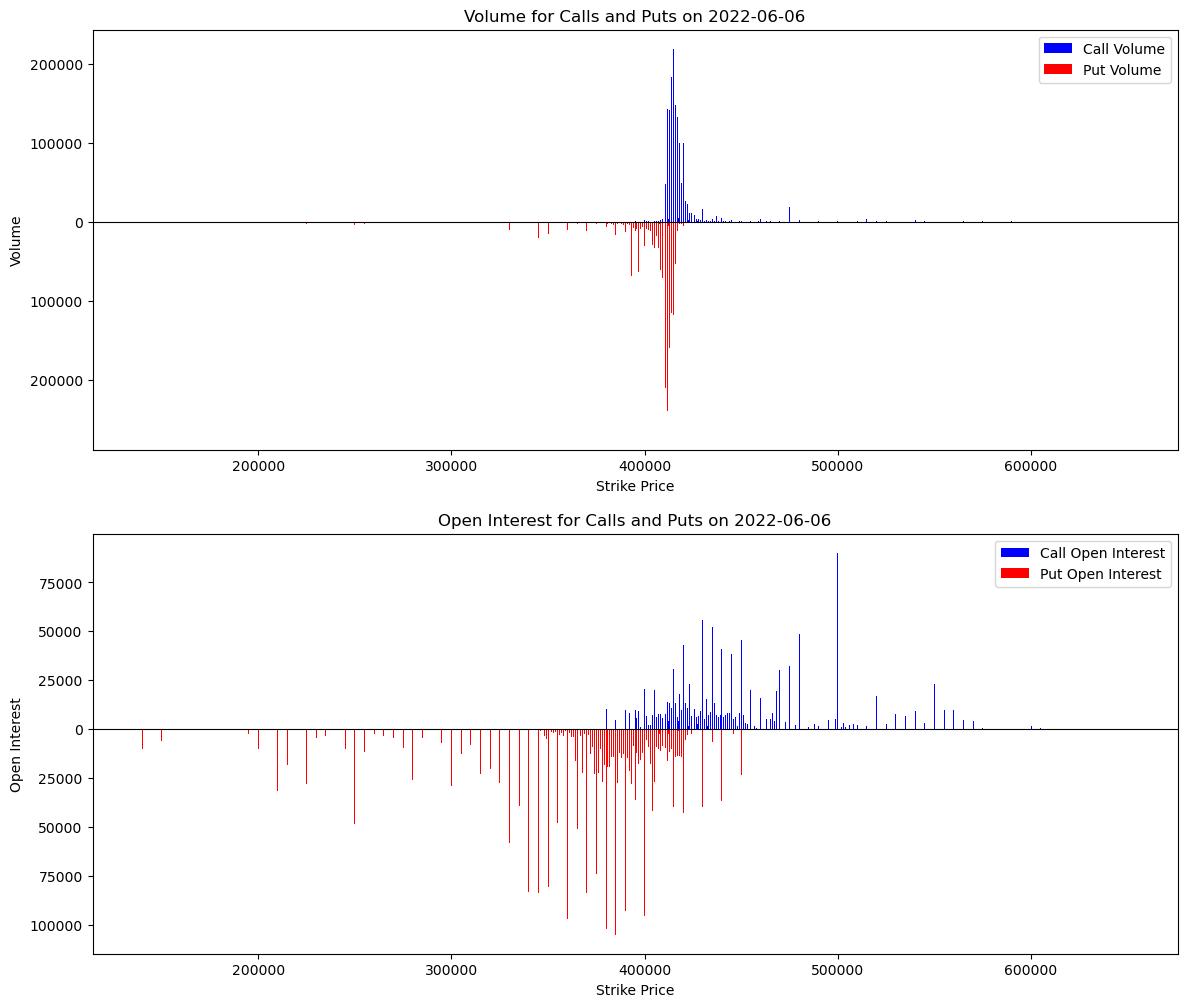

In [22]:
data = pd.read_csv("options_data.csv")

data['date'] = pd.to_datetime(data['date'])

specific_dates = ['2018-03-06', '2021-02-08', '2022-06-06']

for specific_date in specific_dates:
    data_on_specific_date = data[data['date'] == specific_date]

    calls = data_on_specific_date[data_on_specific_date['cp_flag'] == 'C']
    puts = data_on_specific_date[data_on_specific_date['cp_flag'] == 'P']

    puts_volume = puts.copy()
    puts_oi = puts.copy()
    puts_volume['volume'] = -puts_volume['volume']
    puts_oi['open_interest'] = -puts_oi['open_interest']

    combined_volume = pd.concat([calls, puts_volume]).sort_values(by='strike_price')
    combined_oi = pd.concat([calls, puts_oi]).sort_values(by='strike_price')

    fig, axs = plt.subplots(2, 1, figsize=(14, 12))

    axs[0].bar(combined_volume['strike_price'][combined_volume['volume'] > 0], combined_volume['volume'][combined_volume['volume'] > 0], color='blue', width=500, label='Call Volume')
    axs[0].bar(combined_volume['strike_price'][combined_volume['volume'] < 0], combined_volume['volume'][combined_volume['volume'] < 0], color='red', width=500, label='Put Volume')
    axs[0].set_title(f'Volume for Calls and Puts on {specific_date}')
    axs[0].set_xlabel('Strike Price')
    axs[0].set_ylabel('Volume')
    axs[0].axhline(0, color='black', linewidth=0.8)
    axs[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: int(abs(x))))
    axs[0].legend()

    axs[1].bar(combined_oi['strike_price'][combined_oi['open_interest'] > 0], combined_oi['open_interest'][combined_oi['open_interest'] > 0], color='blue', width=500, label='Call Open Interest')
    axs[1].bar(combined_oi['strike_price'][combined_oi['open_interest'] < 0], combined_oi['open_interest'][combined_oi['open_interest'] < 0], color='red', width=500, label='Put Open Interest')
    axs[1].set_title(f'Open Interest for Calls and Puts on {specific_date}')
    axs[1].set_xlabel('Strike Price')
    axs[1].set_ylabel('Open Interest')
    axs[1].axhline(0, color='black', linewidth=0.8)
    axs[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: int(abs(x))))
    axs[1].legend()

The plots above show the volume and open interest quantities for both calls and puts for three different dates throughout the five-year time period. We first observed that the volume quantity for our chosen date in 2018 was nearly 1/5th the quantities observed in the chosen 2021 and 2022 dates near the middle and end of the time span. Individually this does not say too much other than noting that different days will have different distributions, but can provide, considering the other graphs, some additional context for different time perioids. Additionally, as consistently observed for all 3 dates, quantites for volume and open interest for calls are right-skewed while quantities for volume and open interest for puts are left-skewed, ie. there are certain moves far out of the money. Additionally, the open interest values were more spread out than those for volume. Moreover, volume and open interest quantities are heavily concentrated at-the-money while the tails are heavily spread out towards out-of-the-money. 